In [260]:
import numpy as np
import matplotlib.pyplot as plt

<img src="https://static.leiphone.com/uploads/new/article/740_740/201701/5881deecab918.png?imageMogr2/format/jpg/quality/90">

In [3]:
import torch

## Torch.tensor

Торч почти numpy, только вместо array теперь tensor. Каждый torch.tensor является частью вычислительного графа. 

In [ ]:
torch.tensor()

In [ ]:
torch.rand()

In [ ]:
torch.ones()

In [ ]:
torch.diag()

Вместо .shape в torch .size

Вместо .reshape в торч .view

Связка с numpy работает с помощью .numpy()

In [12]:
t = torch.ones((1,2))

In [13]:
t

tensor([[1., 1.]])

In [14]:
t_np = t.numpy()

In [15]:
t_np

array([[1., 1.]], dtype=float32)

In [17]:
t += 1

In [19]:
t

tensor([[2., 2.]])

In [20]:
t_np

array([[2., 2.]], dtype=float32)

Обратно torch.from_numpy

In [21]:
n = np.ones((1,2))

In [22]:
n

array([[1., 1.]])

In [23]:
n_torch = torch.from_numpy(n)

In [24]:
n_torch

tensor([[1., 1.]], dtype=torch.float64)

In [25]:
n += 1

In [26]:
n

array([[2., 2.]])

In [27]:
n_torch

tensor([[2., 2.]], dtype=torch.float64)

## torch.backwards

Мы можем регулировать хотим ли мы чтобы прокидывались градиенты через тензор с помощью torch.tensor(..., requires_grad = True/False). Это важно потому что нам не надо прокидывать градиенты по входу нейронной сети например. 

In [30]:
x = torch.tensor(1., requires_grad=True)
y = torch.tensor(3., requires_grad=True)
z = torch.tensor(5., requires_grad=True)

In [31]:
w = (x + y) * z 

In [32]:
w

tensor(20., grad_fn=<ThMulBackward>)

In [33]:
w.backward()

In [37]:
z.grad

tensor(4.)

In [38]:
y.grad

tensor(5.)

In [39]:
x.grad

tensor(5.)

Попробуем более сложное

In [338]:
x = torch.ones((2,2),requires_grad=True)

In [339]:
y = torch.rand((2,2),requires_grad=True)

In [340]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [341]:
y

tensor([[0.3345, 0.4020],
        [0.4000, 0.1821]], requires_grad=True)

In [342]:
z = x.mm(y)

In [343]:
z

tensor([[0.7346, 0.5841],
        [0.7346, 0.5841]], grad_fn=<MmBackward>)

In [344]:
z.backward(torch.ones(2,2))

In [345]:
x.grad

tensor([[0.7365, 0.5822],
        [0.7365, 0.5822]])

In [346]:
y.grad

tensor([[2., 2.],
        [2., 2.]])

Давайте найдем минимум параболы $x^2 + 3x + 2$

torch.no_grad

In [347]:
x = torch.tensor(3., requires_grad=True)

In [348]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


## torch.optimizer

In [364]:
from torch.optim import SGD

In [365]:
x = torch.tensor(3., requires_grad=True)
y = x**2 + 3*x + 2

In [366]:
sgd = SGD([x], lr = 0.01)

In [367]:
for i in range(1000):
    sgd.zero_grad()
    y = x**2 + 3*x + 2
    y.backward()
    sgd.step()

In [368]:
x

tensor(-1.5000, requires_grad=True)

## torch.nn

In [369]:
import torch.nn as nn
import torch.nn.functional as F

In [370]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 2)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=2, bias=True)
)


In [372]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [379]:
x, y = make_moons(noise = 0.15)

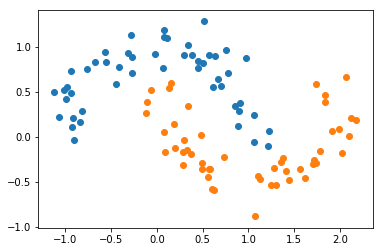

In [380]:
plt.scatter(x[y == 0, 0], x[y == 0, 1])
plt.scatter(x[y == 1, 0], x[y == 1, 1])

In [381]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y)

In [399]:
x_tr_t = torch.tensor(x_tr, dtype=torch.float32)
y_tr_t = torch.tensor(y_tr, dtype=torch.long)

In [400]:
net(x_tr_t[:5])

tensor([[ 0.0498,  0.0574],
        [-0.2282, -0.0499],
        [ 0.0912,  0.0332],
        [-0.3808, -0.1336],
        [-0.0898,  0.0677]], grad_fn=<ThAddmmBackward>)

In [401]:
loss_func = nn.CrossEntropyLoss()

In [402]:
loss = loss_func(net(x_tr_t[:5]), y_tr_t[:5])

In [ ]:
def iterate_minibatches(samples, batchsize, shuffle=True):
    samples = np.asarray(samples)
    if shuffle:
        indices = np.arange(len(samples))
        np.random.shuffle(indices)
    for start_idx in range(0, len(samples) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield samples[excerpt]